In [3]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: 

H_o = The lady testing tea cannot tell whther milk was added first or not, her sucess can be attributed to random chance

H_a = The lady testing tea can tell whether milk was added first and her success is not due to random chance. 

Step 2: The test statistic is the number of cups of tea the woman guessed have had milk added first, which above is 3. 

Step 3: ...

In [6]:
M, n, N = 8, 4, 4
simulation = stats.hypergeom.rvs(M,n,N, size = 100000)
p_val_simulation = (simulation>=3).sum()/100000
print('P_value from simulation:', p_val_simulation)
p_val_cdf=1-stats.hypergeom.cdf(2, M, n, N)
print('P value from cdf:', p_val_cdf)

P_value from simulation: 0.24253
P value from cdf: 0.24285714285714288


Step 4: Based on the p_value calculated above, we fail to reject the null becuase .24 is greater than our threashold of rejection which is .05. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [9]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: 
H_o = Virginica species and versicolor plant species have no difference in mean sepal width.

H_a = The virginica species has a larger mean sepal than that of versicolor. 

Step 2: The test statistic is the difference in mean between versicolor and virginia sepal length. 

Step 3: ...

In [58]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
iris_sub
observed_difference=np.diff(iris_sub.group(0,np.mean).column(1))[0]
print ('Our observed values for sepal width differenct is: ', observed_difference)

Our observed values for sepal width differenct is:  0.20399999999999974


[-0.056 -0.008 -0.008 ... -0.172  0.028 -0.1  ]
The p value is 0.0009


C:\Users\m209120\Downloads\Anaconda_2nd_Download\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


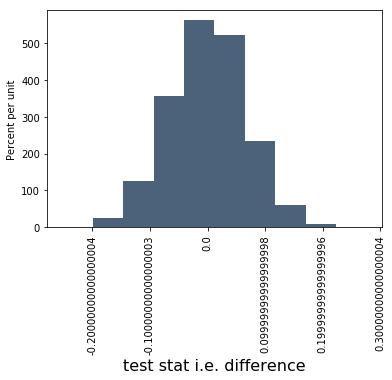

In [66]:
count = iris_sub.num_rows
ts = []

repetitions = 10000
for i in np.arange(repetitions):
    sample = iris_sub.sample(100, with_replacement = False).column(1)
    iris_sample = iris_sub.with_column('sampled', sample)
    ts = np.append(ts,np.diff(iris_sample.group(0, np.mean).column(2))[0])
print(ts)
Table().with_column('test stat i.e. difference', ts).hist(0)
p_value_iris = (ts>=observed_difference).sum()/10000
print('The p value is', p_value_iris)

Step 4: Based on the test from our sample, we reject the null hypothesis and accept the alternative hypothesis that the virginia species has a larger sepal width than the versicolor species and this is attributed to something more than random change. We can reject the null because we generated a p-value of .0009, which is less than our rejection threshold of .05. 